# Predictive Modelling and Data visualiztion

En esta parte nos encargaremos integramente del modelado predictivo del vo2_max usando el dataset reconstruido en la primera parte de este challenge. Está estructurado en este Jupyter notebook de la siguiente manera

1. Análisis exploratorio y busqueda de variables mas significativas del dataset completo
2. Búsqueda de variables más significativas con subconjuntos de datos
3. Búsqueda de conjuntos de variables significativas.

Primero que nada, vamos a exportar todo lo que vamos a necesitar para correr el código.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from numpy import absolute
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 105)
pd.set_option('display.max_columns', 105)

## Análisis exploratorio y busqueda de variables mas significativas del dataset completo

Veamos la data. Vemos que está dentro de los rangos indicados en el excel.

In [4]:
df = pd.read_csv("full_data.csv")
df.describe()

,age,"Backwards Sled, 2 min",Posture exercises,Tricep extensions,Face pulls,Butterfly,Band pull apart (back muscles),Back extensions (on a hyperextension),"Obliques (each side, on a hyperextension)",StretchesKneeling shin_Kneeling shin_,StretchesHip flexor_Hip flexor_,StretchesCouch_Couch_,Leg raises (for abdomen),Seated calf raises,Poliquin step ups,Slant board squats,ATG Split squats,Nordics,Reverse Nordics,"Tibialis raises,",IsoTib ankle rotations,Pull ups,Chin ups,10 min HIIT,N-Acetyl-L-Cysteine (NAC),N-Acetyl-L-Cysteine (NAC) 2,Nicotinamide Riboside Chloride (NR),Zeaxanthin,Phosphorus,Astaxanthin (Natural),Boron Glycinate,CaAKG,Ashwagandha KSM66,Calcium L-5- Methyltetrahydrofolate (L-5-MTHF-Ca),Cocoa Powder (Non-Alkalised) 8+% Flavanols,Red Yeast Rice (2% Monacolin K),Creatine Monohydrate,Ginger,Glucosamine Sulfate KCI,Grape Seed Extract 90% polyphenols,Broccoli Extract (glucoraphanin 10%),Glycine,Theanine,Lactobacillus Acidophilus,Lithium orotate,Pomegranate Juice Extract (50% Polyphenols),Potassium Iodate,Rhodiola 3% Rosavins / Salidroside 1%,Selenium,Glutathione reduced,Lutein,Luteolin,Cinnamon powder (ceylon) organic,Sodium Hyaluronate,Spermidine,Vitamin B1 (Thiamine HCl),Vitamin B12 (Methylcobalamin),Vitamin B2 (Riboflavin-5-Phosphate),Vitamin B3 (Niacinamide),Vitamin B5 (Calcium-D-Pantothenate),Vitamin B6 (Pyridoxal-5- Phosphate),Vitamin B7 (D-Biotin),Vitamin C (Ascorbic Acid),Vitamin D Veg D3,Vitamin E (d-alpha tocopherol),Vitamin K1,Vitamin K2 MK-7 MCT Oil,Vitamin K2 MK-4 MCT Oil,Sunflower lecithin non-GMO,Phosphatidylcholine,Choline,Lycopene,Lysine,Taurine,Glucoraphanin,Ubiquinol,Zinc Citrate,Fiber,Blueberries,Macadamia nuts,Walnuts,Omega 3,Omega 6,Calcium,EVOO polyphenols,Oleic acid,Protein (plant),Copper,Caffeine,Magnesium Citrate,Manganese Citrate,Curcuminoids,Fisetin (smoketree extract),Garlic extract 12:1 odorless,Genistein (Japonica extract),Milled Golden Flaxseed,SDG lignan,Phosphatidylinositol,Phosphatidylethanolamine,vo2_max
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,49.966200,2.500080,2.500800,1.996520,2.47984,2.996760,2.97208,2.005840,1.997120,2.499320,3.00796,1.505080,2.505600,2.009000,2.011880,3.494920,3.027160,2.99784,1.998600,2.496720,3.001480,2.005760,2.00892,1.99036,0.009967,0.010466,0.009481,0.007041,0.021011,0.012037,0.023592,0.006515,0.004498,0.034275,0.011472,0.017037,0.035034,0.045039,0.038946,0.007013,0.016990,0.016392,0.030433,0.045258,0.004991,0.035775,0.022926,0.030820,0.020535,0.028961,0.012525,0.004986,0.012968,0.005496,0.045568,0.008476,0.043613,0.034949,0.034472,0.010963,0.024540,0.017512,0.006507,0.023964,0.023436,0.035127,0.018014,0.018598,0.022514,0.018067,0.031225,0.038566,0.006494,0.023009,0.017430,0.006991,0.015960,0.002994,0.041689,0.04737

Revisemos los tipos de los datos para ver si hay alguno que no corresponda con el tipo entero o float que debería ser, vemos que salvo gender y name, el resto es todo entero, por lo que tenemos que tratar gender de forma aparte para poder hacer la regresión, ya que es una variable categórica.

También hago hincapié en que el nombre no indica nada sobre el comportamiento de la persona, por lo que se elimina al momento de hacer el modelo predictivo.

In [5]:
df.dtypes

age                                                    int64
gender                                                object
name                                                  object
Backwards Sled, 2 min                                  int64
Posture exercises                                      int64
Tricep extensions                                      int64
Face pulls                                             int64
Butterfly                                              int64
Band pull apart (back muscles)                         int64
Back extensions (on a hyperextension)                  int64
Obliques (each side, on a hyperextension)              int64
StretchesKneeling shin_Kneeling shin_                  int64
StretchesHip flexor_Hip flexor_                        int64
StretchesCouch_Couch_                                  int64
Leg raises (for abdomen)                               int64
Seated calf raises                                     int64
Poliquin step ups       

Haremos un one-hot encoding para separar la columna de género en dos columnas booleanas. 

In [6]:
# Handle gender
df = pd.get_dummies(df, columns=['gender'])
df.head()


,age,name,"Backwards Sled, 2 min",Posture exercises,Tricep extensions,Face pulls,Butterfly,Band pull apart (back muscles),Back extensions (on a hyperextension),"Obliques (each side, on a hyperextension)",StretchesKneeling shin_Kneeling shin_,StretchesHip flexor_Hip flexor_,StretchesCouch_Couch_,Leg raises (for abdomen),Seated calf raises,Poliquin step ups,Slant board squats,ATG Split squats,Nordics,Reverse Nordics,"Tibialis raises,",IsoTib ankle rotations,Pull ups,Chin ups,10 min HIIT,N-Acetyl-L-Cysteine (NAC),N-Acetyl-L-Cysteine (NAC) 2,Nicotinamide Riboside Chloride (NR),Zeaxanthin,Phosphorus,Astaxanthin (Natural),Boron Glycinate,CaAKG,Ashwagandha KSM66,Calcium L-5- Methyltetrahydrofolate (L-5-MTHF-Ca),Cocoa Powder (Non-Alkalised) 8+% Flavanols,Red Yeast Rice (2% Monacolin K),Creatine Monohydrate,Ginger,Glucosamine Sulfate KCI,Grape Seed Extract 90% polyphenols,Broccoli Extract (glucoraphanin 10%),Glycine,Theanine,Lactobacillus Acidophilus,Lithium orotate,Pomegranate Juice Extract (50% Polyphenols),Potassium Iodate,Rhodiola 3% Rosavins / Salidroside 1%,Selenium,Glutathione reduced,Lutein,Luteolin,Cinnamon powder (ceylon) organic,Sodium Hyaluronate,Spermidine,Vitamin B1 (Thiamine HCl),Vitamin B12 (Methylcobalamin),Vitamin B2 (Riboflavin-5-Phosphate),Vitamin B3 (Niacinamide),Vitamin B5 (Calcium-D-Pantothenate),Vitamin B6 (Pyridoxal-5- Phosphate),Vitamin B7 (D-Biotin),Vitamin C (Ascorbic Acid),Vitamin D Veg D3,Vitamin E (d-alpha tocopherol),Vitamin K1,Vitamin K2 MK-7 MCT Oil,Vitamin K2 MK-4 MCT Oil,Sunflower lecithin non-GMO,Phosphatidylcholine,Choline,Lycopene,Lysine,Taurine,Glucoraphanin,Ubiquinol,Zinc Citrate,Fiber,Blueberries,Macadamia nuts,Walnuts,Omega 3,Omega 6,Calcium,EVOO polyphenols,Oleic acid,Protein (plant),Copper,Caffeine,Magnesium Citrate,Manganese Citrate,Curcuminoids,Fisetin (smoketree extract),Garlic extract 12:1 odorless,Genistein (Japonica extract),Milled Golden Flaxseed,SDG lignan,Phosphatidylinositol,Phosphatidylethanolamine,vo2_max,gender_F,gender_M
0,72,Shandra Donnelly,5,2,1,4,6,5,1,3,1,4,3,5,2,2,1,1,4,1,2,4,2,2,1,0.0008,0.0148,0.0102,0.0051,0.0022,0.0117,0.0101,0.0122,0.0075,0.0582,0.0026,0.0173,0.0409,0.0438,0.0458,0.0031,0.0020,0.0073,0.0088,0.0642,0.0067,0.0567,0.0270,0.0080,0.0018,0.0320,0.0208,0.0014,0.0227,0.0074,0.0829,0.0136,0.0314,0.0383,0.0603,0.0118,0.0471,0.0132,0.0094,0.0136,0.0145,0.0330,0.0027,0.0099,0.0114,0.0303,0.0028,0.0059,0.0089,0.0147,0.0003,0.0075,0.0206,0.0050,0.0372,0.0666,0.0315,0.0422,0.0052,0.0346,0.0056,0.0066,0.0033,0.0161,0.0126,0.0384,0.0524,0.0149,0.0004,0.0263,0.0026,0.0140,0.0497,0.0139,0.0024,16.3333,False,True
1,20,Gunnar Murazik,5,5,4,1,4,5,2,1,1,4,3,4,4,1,2,5,5,1,2,0,2,1,3,0.0004,0.0034,0.0015,0.0114,0.0366,0.0236,0.0366,0.0070,0.0046,0.0566,0.0064,0.0066,0.0049,0.0016,0.0299,0.0020,0.0287,0.0211,0.0381,0.0243,0.0062,0.0649,0.0192,0.0333,0.0372,0.0091,0.0067,0.0030,0.0098,0.0093,0.0030,0.0002,0.0191,0.0641,0.0503,0.0083,0.0093,0.0261,0.0020,0.0267,0.0415,0.0394,0.0054,0.0133,0.0412,0.0221,0.0114,0.0219,0.0106,0.0060,0.0198,0.0102,0.0059,0.0031,0.0820,0.0164,0.0608,0.0253,0.0615,0.0327,0.0035,0.0299,0.0005,0.0049,0.0154,0.0050,0.0569,0.0009,0.0117,0.0366,0.0214,0.0102,0.0491,0.0035,0.0412,36.8359,True,False
2,30,Miss Brittnie Bosco,3,1,2,2,1,5,3,1,5,5,2,4,0,3,0,5,5,1,2,4,2,4,1,0.0009,0.0168,0.0010,0.0014,0.0398,0.0093,0.0284,0.0097,0.0027,0.0545,0.0214,0.0170,0.0289,0.0781,0.0580,0.0071,0.0094,0.0300,0.0430,0.0464,0.0067,0.0289,0.0325,0.0491,0.0001,0.0041,0.0131,0.0008,0.0100,0.0046,0.0702,0.0062,0.0184,0.0425,0.0202,0.0097,0.0201,0.0200,0.0130,0.0434,0.0455,0.0199,0.0218,0.0054,0.0308,0.0045,0.0434,0.0043,0.0045,0.0451,0.0130,0.0032,0.0188,0.0022,0.0251,0.0363,0.0524,0.0355,0.0493,0.0530,0.0064,0.0012,0.0005,0.0143,0.0252,0.0520,0.0592,0.0238,0.0115,0.0233,0.0122,0.0268,0.0053,0.0206,0.0217,29.2065,True,False
3,31,Tayler Thiel,2,0,3,2,1,3,4,2,2,3,1,0,0,2,3,0,4,2,1,5,0,1,4,0.0195,0.0064,0.0144,0.0019,0.0344,0.0144,0.0053,0.0025,0.0015,0.0244,0.0107,0.0207,0.0571,0.0

In [7]:

# Obtenemos nuestras variables X e Y
y = df['vo2_max']
#We don't need name
X = df.drop(['vo2_max','name'], axis=1)

Se programa un regresor de XGBoost pero la ejecución toma unos 8 minutos en mi computador, para lo que sigue se usarán modelos mas sencillos como una regresión lineal simple.

In [24]:
# Train without preporcessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.448 (0.009)


Linear Regression Score: 0.9605619057867664


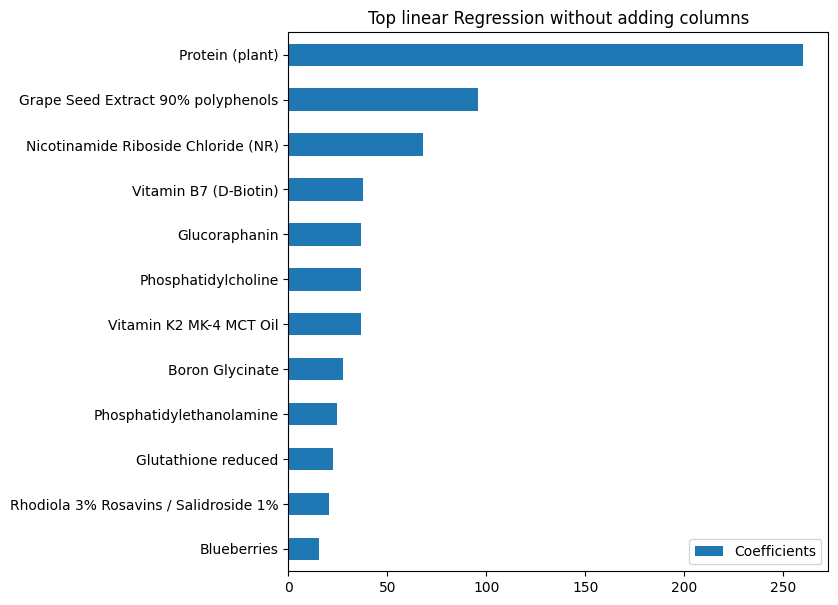

In [8]:
# Try Linear Regression

reg = LinearRegression().fit(X, y)
print("Linear Regression Score:", reg.score(X, y))

coefs = pd.DataFrame(
    reg.coef_, columns=["Coefficients"], index=X.columns
)

top_coefs = coefs[abs(coefs['Coefficients']) > 10].sort_values(by='Coefficients')

plt.rcParams["figure.figsize"] = 20,10
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Top linear Regression without adding columns")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Notamos que no aparecen ni las variables de género ni la edad al hacer la regresión lineal. En este punto, nos gustaría ser un poco más precisos y ver si agregando features se puede obtener un mejor resultado. Vamos a agregar una columna de si la persona es mayor de edad o no para ver si es importante.

No escalamos las features porque vienen en escalas distintas por lo que no son comparables.

In [9]:
# Now we will try to preprocess data a little bit more.
# First we will scale the data as it is in different scales 
# And we will add a new bool variable "is_elderly" if the sample comes from a person over 60 years old

X['is_elderly'] = np.where(X['age'] > 60, 1,0)

In [10]:
#Define functions we will be using a lot in this part
def make_linear_regression(X: pd.DataFrame,y: pd.DataFrame):
    """Function to make a linear regression

    Args:
            X (pd.DataFrame): preprocessed data.
            y (pd.DataFrame): target.
    """
    pipeline = Pipeline([('linear_regression', LinearRegression())])

    pipeline.fit(X, y)
    print("Linear Regression Score:", pipeline.score(X, y))
    coefs_sc = pd.DataFrame(
        pipeline.named_steps['linear_regression'].coef_, columns=["Coefficients"], index=X.columns
    )

    return coefs_sc[abs(coefs_sc['Coefficients']) > 10].sort_values(by='Coefficients')

def make_tree_regression(X: pd.DataFrame,y: pd.DataFrame):
    """Function to make a decision tree regression

    Args:
            X (pd.DataFrame): preprocessed data.
            y (pd.DataFrame): target.
    """
    pipeline = Pipeline([('tree_regression', DecisionTreeRegressor())])

    pipeline.fit(X, y)
    print("Decision Tree Regression Score:", pipeline.score(X, y))
    coefs_sc = pd.DataFrame(
        pipeline.named_steps['tree_regression'].feature_importances_, columns=["Coefficients"], index=X.columns
    )

    return coefs_sc.sort_values(by='Coefficients', ascending=False)[:12]

Linear Regression Score: 0.9660939426226756
                                       Coefficients
Blueberries                               15.540468
Rhodiola 3% Rosavins / Salidroside 1%     20.708733
Glutathione reduced                       22.713024
Phosphatidylethanolamine                  24.418415
Boron Glycinate                           27.688588
Vitamin K2 MK-4 MCT Oil                   36.374376
Phosphatidylcholine                       36.494295
Glucoraphanin                             37.264336
Vitamin B7 (D-Biotin)                     38.210610
Nicotinamide Riboside Chloride (NR)       68.569486
Grape Seed Extract 90% polyphenols        96.069534
Protein (plant)                          259.685261


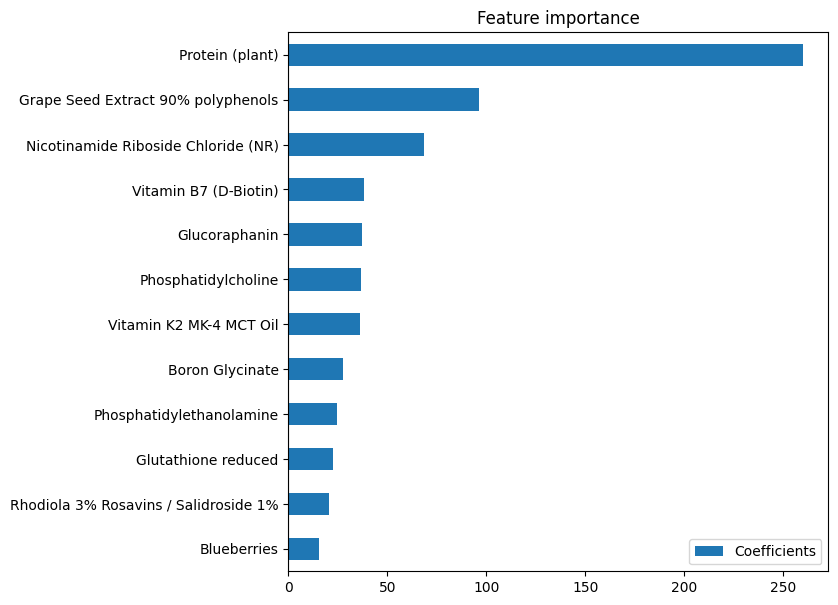

In [11]:
#We do the linear regression again with the new column

top_coefs = make_linear_regression(X,y)
print(top_coefs)

plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Notemos que el regression score mejora ligeramente. Pero la nueva variable aún no aparece.

We would like to test another model to see if the important features vary or not

Decision Tree Regression Score: 1.0
                                     Coefficients
age                                      0.919196
Vitamin B7 (D-Biotin)                    0.004122
Phosphatidylethanolamine                 0.003984
Vitamin K2 MK-4 MCT Oil                  0.003637
Glucoraphanin                            0.003422
Blueberries                              0.003415
Phosphatidylcholine                      0.003402
Boron Glycinate                          0.003243
Glutathione reduced                      0.003214
Grape Seed Extract 90% polyphenols       0.003166
Protein (plant)                          0.003157
Nicotinamide Riboside Chloride (NR)      0.002995


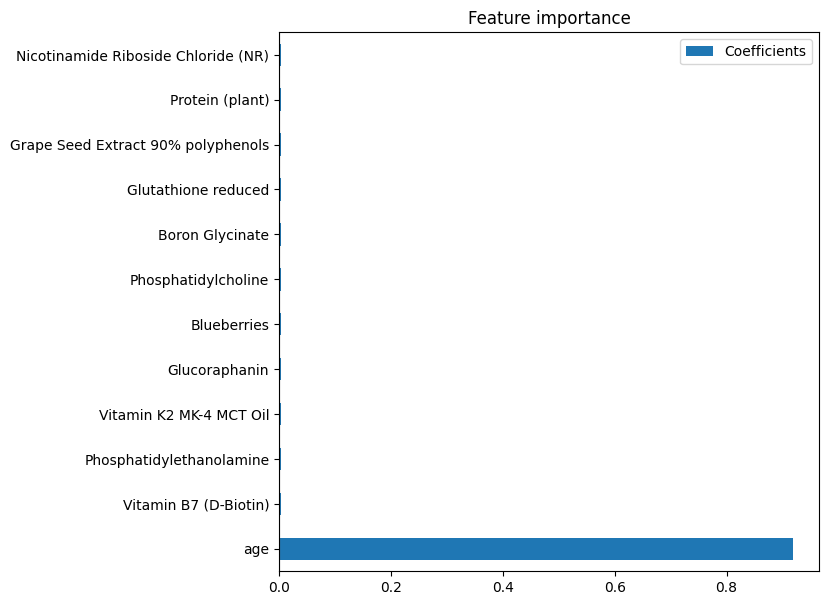

In [12]:
#We do the linear regression again with the new column
top_coefs = make_tree_regression(X,y)
print(top_coefs)
plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Podemos notar que ahora Age es una columna MUY importante, el resto de las columnas son similares a las que nos entrgó la regresión lineal pero en un grado de importancia muchísimo menor a la edad.

## Búsqueda de variables más significativas con subconjuntos de datos

Probaremos 3 combinaciones posibles para ver la importancia de las variables con una regresión lineal

1. Solo datos de mujeres
2. Solo datos de hombres 
3. Solo datos de personas mayores de 60 años.

### Regresiones lineales


Linear Regression Score: 0.9663506269258756
                                       Coefficients
Blueberries                               16.101257
Rhodiola 3% Rosavins / Salidroside 1%     20.421220
Glutathione reduced                       22.637265
Phosphatidylethanolamine                  24.224110
Boron Glycinate                           28.220093
Vitamin K2 MK-4 MCT Oil                   36.732635
Phosphatidylcholine                       36.748156
Glucoraphanin                             38.089387
Vitamin B7 (D-Biotin)                     38.451082
Nicotinamide Riboside Chloride (NR)       68.513134
Grape Seed Extract 90% polyphenols        96.513458
Protein (plant)                          258.389766


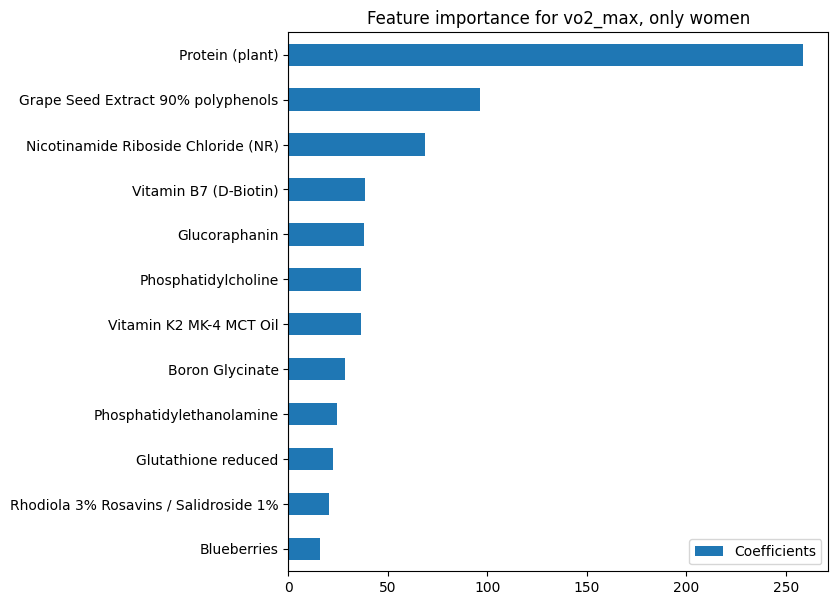

In [13]:
# Revise if the importance changes by Male of Female

X_F = X[X['gender_F'] == True]
y_F = df[df['gender_F'] == True]['vo2_max']

# Linear Regression
top_coefs = make_linear_regression(X_F,y_F)
print(top_coefs)

plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance for vo2_max, only women")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Linear Regression Score: 0.9660708942350953
                                       Coefficients
Blueberries                               15.053655
Rhodiola 3% Rosavins / Salidroside 1%     21.035699
Glutathione reduced                       22.718141
Phosphatidylethanolamine                  24.614255
Boron Glycinate                           27.207949
Vitamin K2 MK-4 MCT Oil                   35.999609
Phosphatidylcholine                       36.328386
Glucoraphanin                             36.488733
Vitamin B7 (D-Biotin)                     37.998261
Nicotinamide Riboside Chloride (NR)       68.460354
Grape Seed Extract 90% polyphenols        95.778869
Protein (plant)                          261.237171


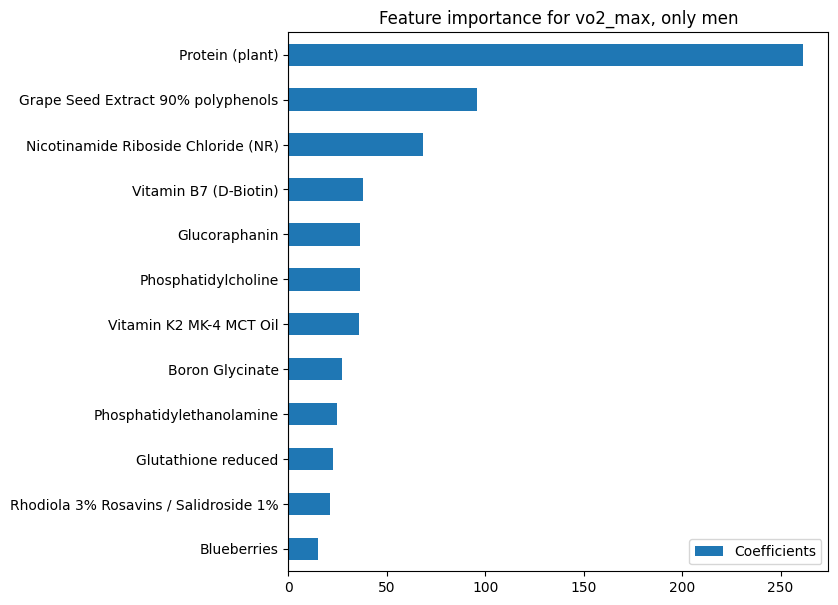

In [14]:
# Revise if the importance changes by Male of Female

X_M = X[X['gender_M'] == True]
y_M = df[df['gender_M'] == True]['vo2_max']

# Linear Regression
top_coefs = make_linear_regression(X_M,y_M)
print(top_coefs)

plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance for vo2_max, only men")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Linear Regression Score: 0.790012312660676
                                       Coefficients
Blueberries                               12.947402
Rhodiola 3% Rosavins / Salidroside 1%     17.966980
Glutathione reduced                       18.067004
Phosphatidylethanolamine                  19.749591
Boron Glycinate                           22.995640
Vitamin K2 MK-4 MCT Oil                   29.255169
Vitamin B7 (D-Biotin)                     31.282215
Phosphatidylcholine                       31.737302
Glucoraphanin                             32.214241
Nicotinamide Riboside Chloride (NR)       57.342227
Grape Seed Extract 90% polyphenols        78.279001
Protein (plant)                          211.917690


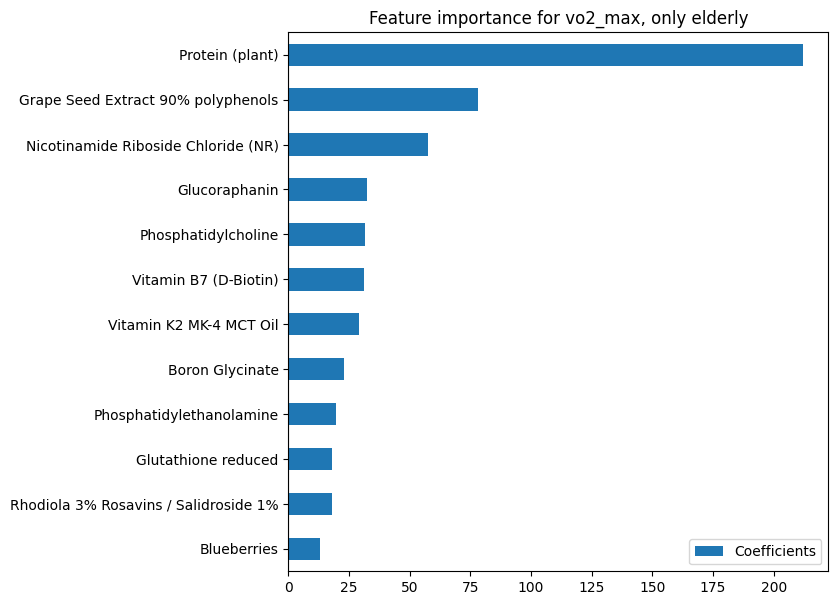

In [15]:
# Revise if the importance changes if you are elderly

X_eld = X[X['age'] > 60]
y_eld = df[df['age'] > 60]['vo2_max']

# Linear Regression
top_coefs = make_linear_regression(X_eld,y_eld)
print(top_coefs)

plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance for vo2_max, only elderly")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Notamos que para hombres y mujeres los coeficientes de cada muestra son muy similares. Pero para el caso de las personas mayores el score de la regresión disminuye, y los coeficientes de las variables también disminuyen notoriamente, por lo que la dependencia no es tan fuerte. 

Por completitud, vamos a hacer un análisis de importancia de features usando el arbol de decisión ocupando los mismos 3 categorías.

### Decision Tree Regressor

Decision Tree Regression Score: 1.0
                                       Coefficients
age                                        0.918427
Vitamin B7 (D-Biotin)                      0.004457
Grape Seed Extract 90% polyphenols         0.004010
Blueberries                                0.004001
Phosphatidylethanolamine                   0.003875
Glucoraphanin                              0.003848
Protein (plant)                            0.003561
Nicotinamide Riboside Chloride (NR)        0.002935
Rhodiola 3% Rosavins / Salidroside 1%      0.002900
Glutathione reduced                        0.002863
Phosphatidylcholine                        0.002854
Boron Glycinate                            0.002549


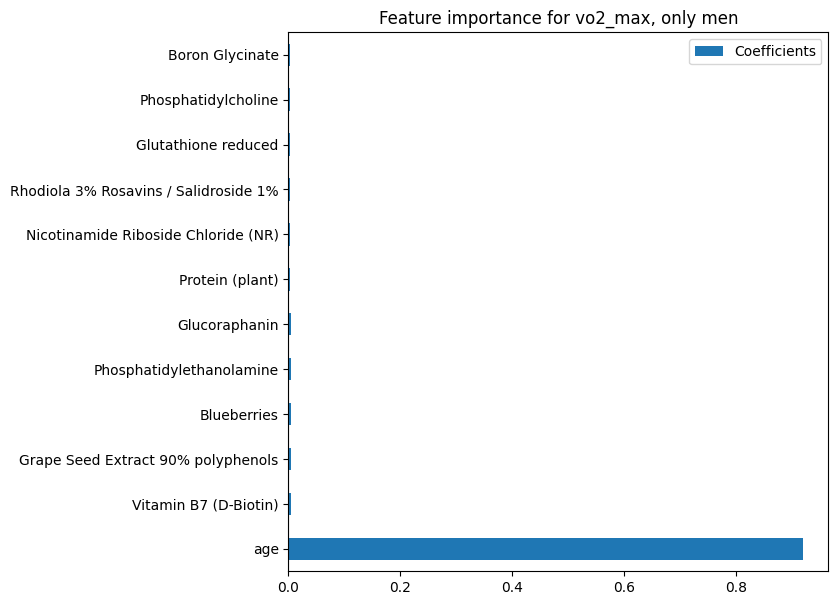

In [16]:
top_coefs = make_tree_regression(X_M,y_M)
print(top_coefs)


plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance for vo2_max, only men")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Decision Tree Regression Score: 1.0
                                       Coefficients
age                                        0.920025
Vitamin K2 MK-4 MCT Oil                    0.004253
Phosphatidylcholine                        0.003744
Boron Glycinate                            0.003617
Vitamin B7 (D-Biotin)                      0.003309
Glucoraphanin                              0.003251
Phosphatidylethanolamine                   0.003245
Nicotinamide Riboside Chloride (NR)        0.003035
Blueberries                                0.002967
Glutathione reduced                        0.002958
Rhodiola 3% Rosavins / Salidroside 1%      0.002442
Grape Seed Extract 90% polyphenols         0.002439


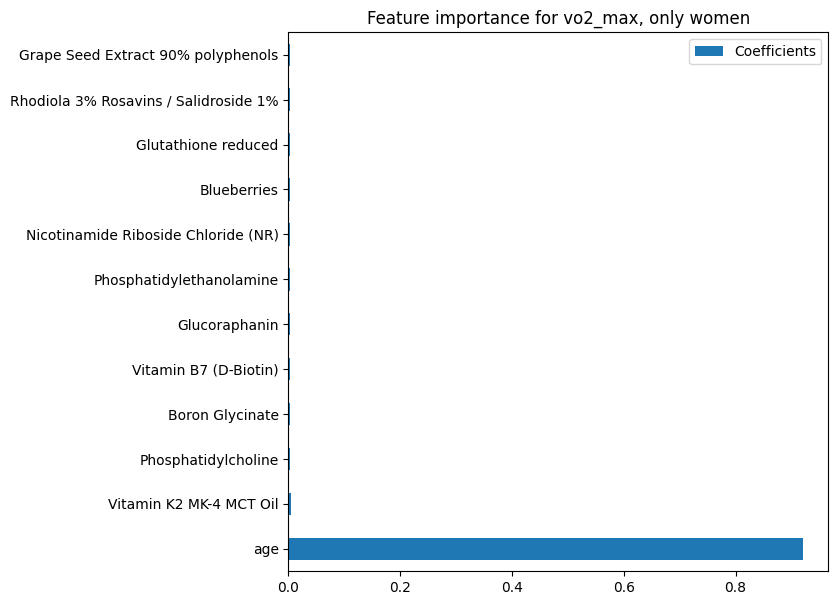

In [17]:
# Decision Tree Regressor for women
top_coefs = make_tree_regression(X_F,y_F)
print(top_coefs)

plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance for vo2_max, only women")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Decision Tree Regression Score: 1.0
                                       Coefficients
age                                        0.658038
Glucoraphanin                              0.018419
Phosphatidylcholine                        0.016884
Boron Glycinate                            0.015631
Vitamin K2 MK-4 MCT Oil                    0.015358
Nicotinamide Riboside Chloride (NR)        0.014969
Vitamin B7 (D-Biotin)                      0.014884
Grape Seed Extract 90% polyphenols         0.014447
Blueberries                                0.014383
Phosphatidylethanolamine                   0.013275
Rhodiola 3% Rosavins / Salidroside 1%      0.012548
Protein (plant)                            0.011085


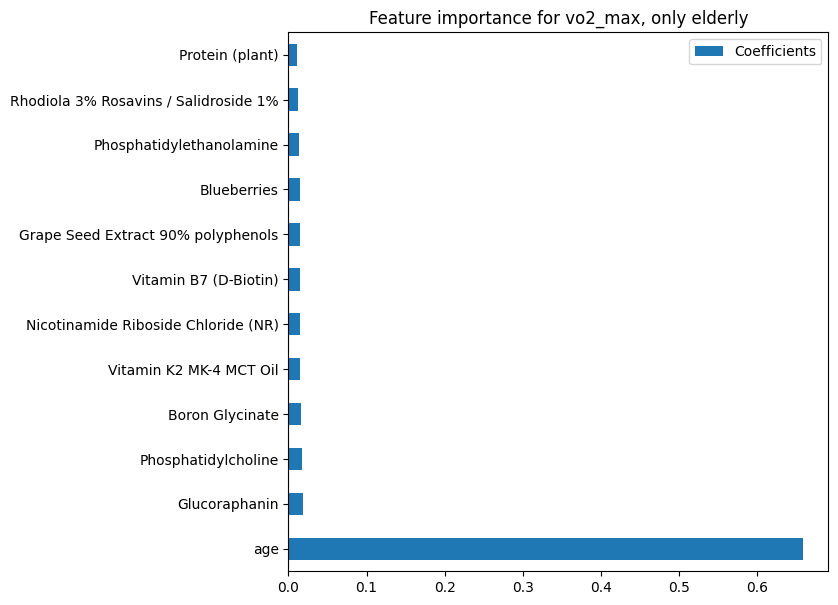

In [18]:
# Decision Tree Regressor for elderly
top_coefs = make_tree_regression(X_eld,y_eld)
print(top_coefs)

plt.rcParams["figure.figsize"] = 60,100
top_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature importance for vo2_max, only elderly")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Incluso dentro de los mayores, la edad sigue siendo muuuy determinante, pero podemos ver que se repiten las variables pero ahora tienen mas importancia y cambia un poco el orden, por ejemplo el `Nicotinamide Riboside Chloride (NR)` y el `Glucoraphanin` sube de importancia con respecto a las otras simulaciones, pero el `Vitamin K2 MK-4 MCT Oil`, compensando que la edad baja su importancia dentro de la regresión con un arbol de decisión.

Una conclusión que notamos. Todas las variables con mayor importancia dentro de nuestro modelo son relacionadas con la edad o con los suplementos, no han aparecido relacionadas con el ejercicio, esto sugiere que los suplementos tienen una mayor influencia en la capacidad respiratoria, y por ende en la longevidad. Incluso más que el ejercicio, lo cual me parece contraintuitivo.

## Búsqueda de conjuntos de variables significativas.


In [19]:
import shap


model = DecisionTreeRegressor().fit(X,y)

explainer = shap.TreeExplainer(model)

shap_values = explainer(X)

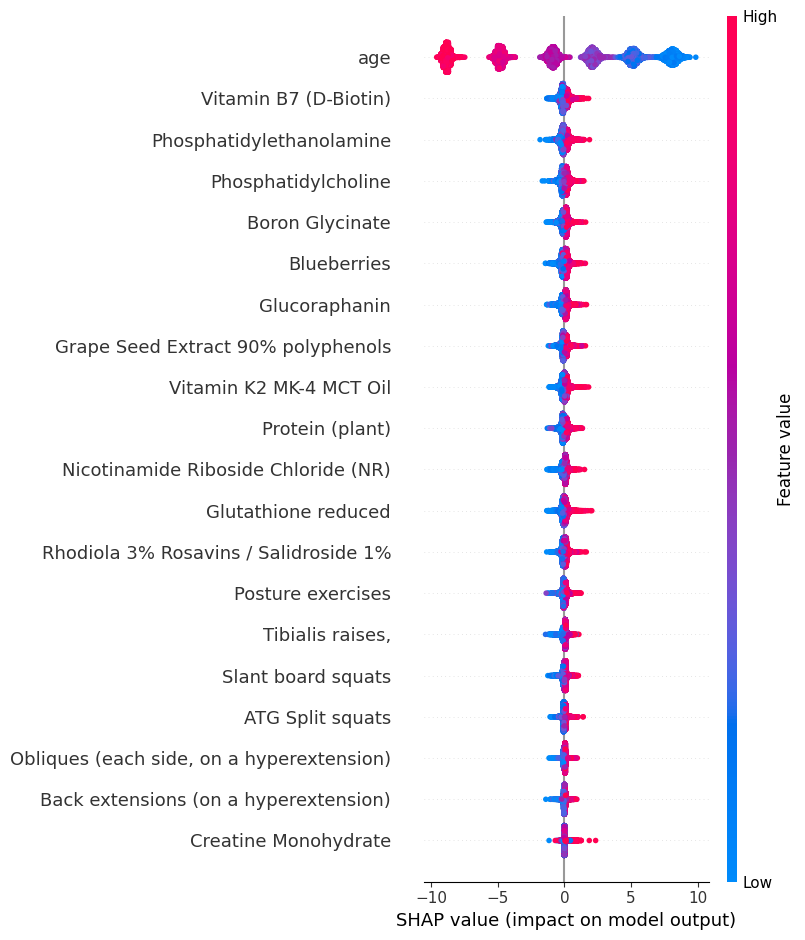

In [182]:
shap.summary_plot(shap_values, X)

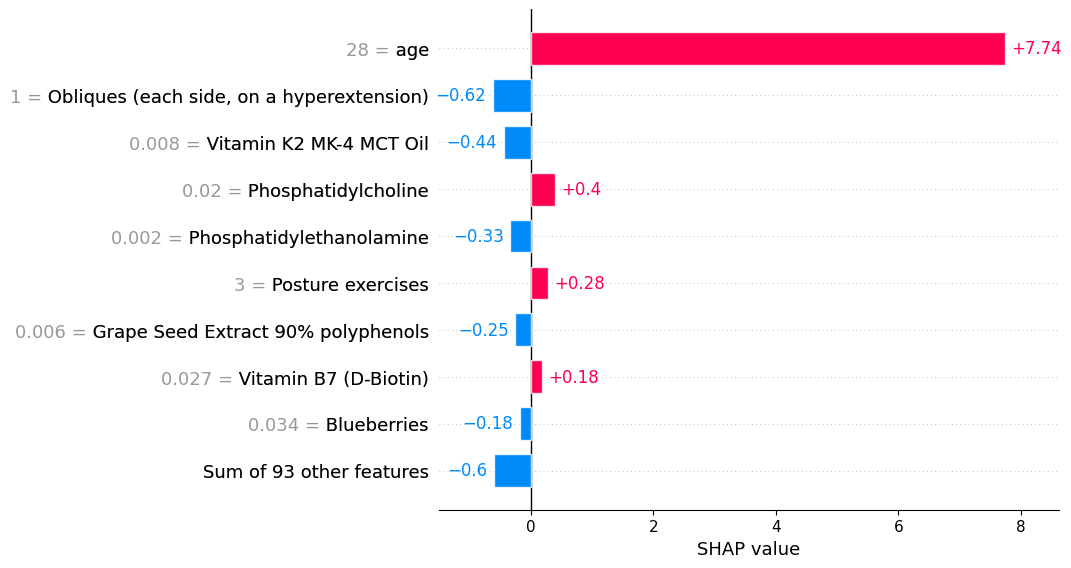

In [27]:
shap.plots.bar(shap_values[14])